# Twist and Shout

Applications of the Techniques from Lessons 1 and 2. 

Here I attempted to analyze doppler radar images to see if they showed the presence of a tornado. While the problem appears to be a simple image recognition/classification on the surface, it is more complicated than that. 

## State of the Work
The results shwon here are very poor. At first glance (and assuming that you can really truly determine the presence of a tornado by simply looking at an image of an echo from a Dopller radar) there are several problems with this work as it stands:

* It was very difficult to get properly (accurately) tagged images from a Google search. Many images showed up in both "tornado" and "not-tornado". 
* The searches produced a very high number of images that had nothing to do with a radar echo (screen) display. They included pictures of people, radar stations, tornados and sky shots of the storm.
* Very, very small amount of acdtual pictures of radar echos.
* Many of the pictures were 'annotated' with overlay graphics and arrows

As it is, this notebook is therefore not very useful at all, other than to show that I could succesfully apply the techinques from lessons 1 and 2 to different problem. 

## Future work

After more research, if I want to pursue the tornado detection work based solely on radar echo images, then I will need to have properly curated images and images that adress the shortcoming and limitations identified above.

I have not found a "database" of these images and it does not appear that anybody has attempted to do tornado detection by solely using radar echo images (probably because it is silly and there are probably other conditions that need to be analyzed). 

At this moment, as I see it, the only way to move foward is to collect this data from sources that mitigate (or elimnate) the limitations above. There seems to be a source for these images nd this is the National Weather Service, NOAA, Oklahoma University weather data and others. this data is not readily available to download but has to be accessed and queried in order to obtain the images of interest. While there may be a way to get to this data progrmatically, it is not sorted as we need it and so code will have to written to query the appropriate databases to extract the data. This will be cumbersome as we will need to know things such as when there was a tornado identified by the National Weather Service, the data, the area of the country, the radar station that picked it up.   There are several tools provided that could be used for this, but the effor may be significant.  For now I will not attempt this and only note this for future work if I decide to purpuse this (this is a personal interest are for me)

## Environment

* This is being run on my GPU enabled workstation.
    * i9-9820X CPU
    * GeForce GTX RTX 2080i card (11G Memory)
    * CPU 32G Memoroy
    * 750G SSD storage
* Ubuntu 18.04 LTS (Server)
* Installation of PyTorch and fast.ai libraries as described in the fast.ai web site
    * Used the Amazon AWS installation instructions as a guide
    * Used Intel Python binaries instead of standard conda python distribution. 

First let's make sure that the NVIDIA drivers see the card. We use a utility provided by NVIDIA

In [1]:
!nvidia-smi

Tue May 14 21:25:06 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 415.27       Driver Version: 415.27       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:B3:00.0  On |                  N/A |
| 41%   33C    P8     2W / 260W |    360MiB / 10981MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Getting Images from Google

In this version of the notebook the 'training' data will be obtained from Google Images.  So the images that I collect will be based on simple searches. The keywords are as follows:

* Dopler Radar Hook Echo (Tornado Signature brought too many extraneous pictures)
* Tornado Hook on Radar
* Dopler radar severe thunderstorm
* Dopler radar rain

Unfortunately the data that we get from these searches is pretty poor, but I will continue and use it to demonstrate the techniques that need to be used.

## Some Set Up

The next lines make sure make sure that any updates to the underlying library at any point of time should be automatically reloaded/refreshed. For the most part while I was running this notebook I did not make any changes to the underlying libraries. I thought that the original libraries I picked were good enough for this lesson's work. This may change in future lessons.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import all of the pakcages:

* fastai V1.0 library. https://docs.fast.ai


In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

## Download Images

Go to Google Images and search for the images that we are interested in using the keywords above. Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown. Note This actually improved the quality of the data I got as it removed GIFs and other non-picture items.

Press Ctrl+Shift+J in Windows/Linux and Cmd+Opt+J in Mac, and a small window with the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

`urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));`

**NOTE** Make sure you disable any Add blockers or the above code will not work. If it is succesful it will download a file clled `download.csv` to your `Downloads` folder.

There are a few things to do with this file before proceeding:

* Rename it. I follow a convention that says `urls_class_name.csv`
* Move to the data folder in your project. This is specified below in a cell by the `path = Path('data/twistshout')` line. 

Once you do that, you can proceed and run the cells in this notebook.

In [28]:
classes = ['tornado','severe-thunderstorm']

In [18]:
# Take care of the Tornados
folder = 'tornado'
file = 'urls_tornado.csv'

In [19]:
path = Path('data/twistshout')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [22]:
path.ls()

[PosixPath('data/twistshout/tornado')]

In [24]:
#Download the tornado pictures
download_images(path/file, dest, max_pics=200)

Error x-raw-image:///919b5450b66a63d2cf886fde7af098876e9b9cd5cb090eb318abeec711c0735d No connection adapters were found for 'x-raw-image:///919b5450b66a63d2cf886fde7af098876e9b9cd5cb090eb318abeec711c0735d'
Error x-raw-image:///0e141d06eec29e3e79b3db0091fca58031dd8067086577fa7c865cf6f662d9ea No connection adapters were found for 'x-raw-image:///0e141d06eec29e3e79b3db0091fca58031dd8067086577fa7c865cf6f662d9ea'
Error x-raw-image:///2457f6f7dca036777efe85b25362b16d3e486759f829080cb20bf7c689fb3071 No connection adapters were found for 'x-raw-image:///2457f6f7dca036777efe85b25362b16d3e486759f829080cb20bf7c689fb3071'
Error x-raw-image:///629d6c5b73b8fefb1469ce5714b18e29ae8061b0f7919484890898cb3eee3985 No connection adapters were found for 'x-raw-image:///629d6c5b73b8fefb1469ce5714b18e29ae8061b0f7919484890898cb3eee3985'
Error x-raw-image:///32fd5f16c3f6905e1b76c46596c4e55a9d629557fcb68dad3d7058f484e1b216 No connection adapters were found for 'x-raw-image:///32fd5f16c3f6905e1b76c46596c4e55a9d62

In [39]:
# Take care of the Severe Thunderstorm
folder = 'severe-thunderstorm'
file = 'urls_severe-thunderstorm.csv'

In [40]:
path = Path('data/twistshout')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [41]:
path.ls()

[PosixPath('data/twistshout/urls_tornado.csv'),
 PosixPath('data/twistshout/severe-thunderstorm'),
 PosixPath('data/twistshout/urls_severe-thunderstorm.csv'),
 PosixPath('data/twistshout/tornado')]

In [42]:
#Download the severe-thunderstorm pictures
download_images(path/file, dest, max_pics=200)

Error https://www.washingtonpost.com/resizer/uD6tCW8ck7Ib_nQTuOSdQxH5nPE=/660x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/LPSQNLVDIVC2DIZL42IZ5NMGXU.gif HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error x-raw-image:///97a7877be3842a3aa905e6e8474d4400db9e96fb9a0365e81dd9878a42fdecaf No connection adapters were found for 'x-raw-image:///97a7877be3842a3aa905e6e8474d4400db9e96fb9a0365e81dd9878a42fdecaf'
Error https://www.washingtonpost.com/resizer/q33e8rVNfTmom4drTYMvmUEjz_g=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/M2TMNMM3NRFETA34JZB2U444DU.png HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/blogs/capital-weather-gang/files/2013/06/WUNIDS_composite_archive.gif&w=640 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4

Remove images that can't be opened

In [43]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

tornado


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:941: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/twistshout/tornado/00000192.png'>
cannot identify image file <_io.BufferedReader name='data/twistshout/tornado/00000081.jpg'>


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:941: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:941: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/twistshout/tornado/00000061.jpg'>
cannot identify image file <_io.BufferedReader name='data/twistshout/tornado/00000199.png'>
cannot identify image file <_io.BufferedReader name='data/twistshout/tornado/00000095.jpg'>


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:941: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:941: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
severe-thunderstorm


cannot identify image file <_io.BufferedReader name='data/twistshout/severe-thunderstorm/00000183.svg'>
cannot identify image file <_io.BufferedReader name='data/twistshout/severe-thunderstorm/00000104.svg'>
cannot identify image file <_io.BufferedReader name='data/twistshout/severe-thunderstorm/00000000.png'>
cannot identify image file <_io.BufferedReader name='data/twistshout/severe-thunderstorm/00000186.jpg'>


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:941: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:941: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/twistshout/severe-thunderstorm/00000160.jpg'>


## View Data

In [44]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [72]:
# these are the data classes. They were derived from the directories

data.classes

['severe-thunderstorm', 'tornado']

Now let's look at the pictures quickly. We want to scan the pictures to make sure we have pictures that are not going to cause any problems. As you will see, the first time you run this you will get pictures that have nothing to do with the classes that we are interested it, or worse they happen to have th wrong formt. 

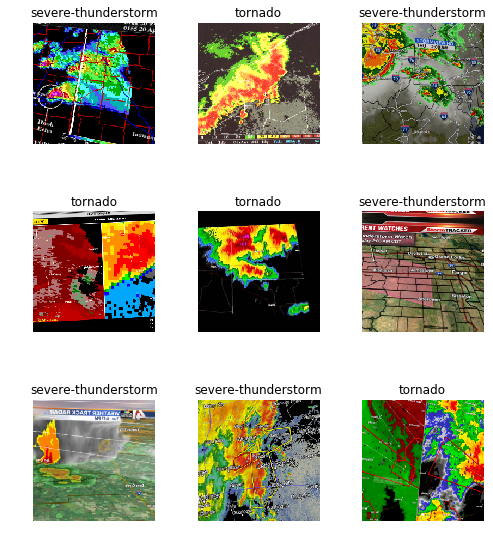

In [73]:
data.show_batch(rows=3, figsize=(7,8))

After looking at the above pictures, it is clear that we need to clean the dataset as there are several images that are not radar images.

## Train a Model

In [75]:
# We need to create a model. Here I will use ResNet50
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [76]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.962893,0.653193,0.390244,00:03
1,0.951108,1.010463,0.560976,00:01
2,0.840056,1.370015,0.560976,00:01
3,0.737681,1.252293,0.512195,00:01


In [77]:
# Train some more as the training loss is pretty high and still coming down
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.461637,1.194242,0.414634,00:01
1,0.488578,1.122859,0.487805,00:01
2,0.455061,1.118465,0.439024,00:01
3,0.432794,1.203864,0.512195,00:01
4,0.417793,1.318050,0.463415,00:01
5,0.402298,1.468203,0.487805,00:01
6,0.373461,1.509924,0.560976,00:01
7,0.368027,1.521379,0.585366,00:01
8,0.357384,1.524371,0.560976,00:01
9,0.363094,1.528755,0.585366,00:01


As mentioned in the intro to this notebook, this is not very good.

In [78]:
from fastai.widgets import *

In [79]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

Clean (manually) the data. This is a very tedious manual operation. The next cell displays a simple GUI where you go through each image and either correct its label or remove it from the dataset. Whent it has finisehd it will print 'No images to show'

In [80]:
# Use the Image Cleaner
# Uncomment the next line to see documentation for ImageCleaner
# ??ImageCleaner
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [81]:
# Create new image bunch from the cleaned up data
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
       ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [82]:
path.ls()

[PosixPath('data/twistshout/urls_tornado.csv'),
 PosixPath('data/twistshout/models'),
 PosixPath('data/twistshout/severe-thunderstorm'),
 PosixPath('data/twistshout/urls_severe-thunderstorm.csv'),
 PosixPath('data/twistshout/tornado'),
 PosixPath('data/twistshout/cleaned.csv')]

In [83]:
# Check the data classes

data.classes

['severe-thunderstorm', 'tornado']

Look at the data. It looks better. At least in this sample there seems to be less extraneous images.

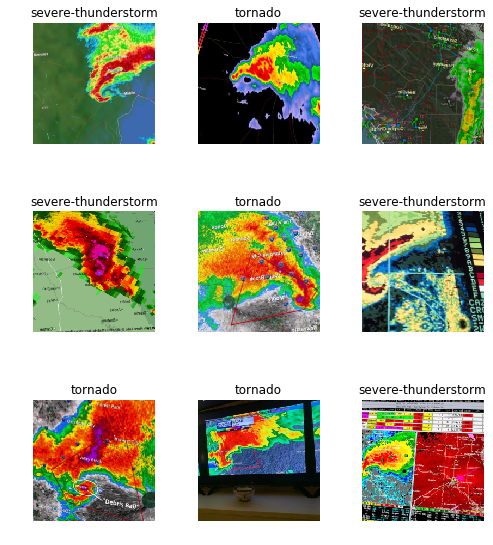

In [84]:
data.show_batch(rows=3, figsize=(7,8))

In [85]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['severe-thunderstorm', 'tornado'], 2, 124, 30)

In [86]:
# Create a new model - will use a new name to avoid confusing it with the
# one we created above
learn_clean = cnn_learner(data, models.resnet50, metrics=error_rate)

In [87]:
# Fit the model
learn_clean.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.892391,1.011481,0.400000,00:02
1,0.888972,0.786123,0.400000,00:01
2,0.824417,0.890361,0.366667,00:01
3,0.782184,0.617787,0.300000,00:01
4,0.762869,0.905246,0.366667,00:01
5,0.760782,1.428546,0.533333,00:01
6,0.716575,1.646051,0.533333,00:01
7,0.675488,1.714601,0.533333,00:01
8,0.662177,1.642505,0.533333,00:01
9,0.628381,1.577317,0.466667,00:01


In [88]:
# Save new model
learn_clean.save('tw_stage-1-cleaned')

In [89]:
#Unfreeze
learn_clean.unfreeze()

In [90]:
# Find learning rate
learn_clean.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


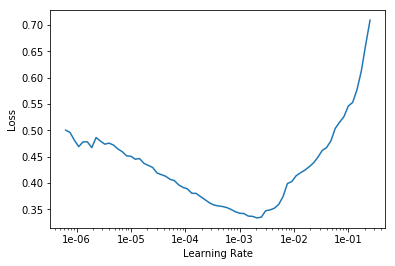

In [91]:
learn_clean.recorder.plot()

In [92]:
learn_clean.load('tw_stage-1-cleaned')
learn.fit_one_cycle(40, max_lr=slice(1.0e-5,1.0e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.301122,1.519243,0.634146,00:01
1,0.322147,1.506541,0.609756,00:01
2,0.310813,1.514064,0.585366,00:01
3,0.305772,1.510697,0.609756,00:01
4,0.308876,1.540291,0.609756,00:01
5,0.322478,1.548022,0.609756,00:01
6,0.330096,1.544752,0.609756,00:01
7,0.332369,1.558400,0.634146,00:01
8,0.319124,1.553970,0.609756,00:01
9,0.310475,1.544289,0.585366,00:01


In [93]:
learn_clean.save('tw_stage-2-clean')

In [94]:
interp = ClassificationInterpretation.from_learner(learn_clean)

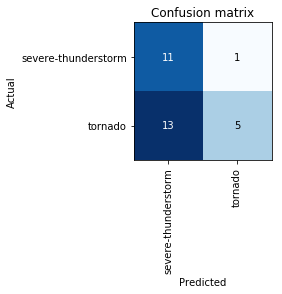

In [95]:
interp.plot_confusion_matrix()

### Observations

TBD

## References

1. fast.ai class notebook. https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb
2. fast.ai lesson1 notes: https://forums.fast.ai/t/deep-learning-lesson-1-notes/27748
3. https://course.fast.ai/videos/?lesson=1